# Analysis of NYC Taxi Data - July 2018

## Setup

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_columns', 40)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
import Plotting
Plotting.plotly.offline.init_notebook_mode(connected=True)

## Extract, Transform, Load

In [7]:
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',encoding='utf-8-sig')
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv')
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',nrows=200)   #skiprows=100
#df = pd.read_csv('/Users/Delta/Downloads/trip_fare_4.csv',nrows=2,encoding='utf-8-sig')   #skiprows=100

df=pd.read_hdf('data_taxi_merged.h5', 'df')

### Get initial feel for data and quality

In [8]:
df.shape

(15100468, 21)

In [9]:
peek=df.head(5)

In [10]:
peek

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.5,759
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.6,540
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.6,1318
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.9,799
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.6,1017


In [11]:
df.dtypes

medallion               object
 hack_license           object
 vendor_id              object
 pickup_datetime        object
 payment_type           object
 fare_amount           float64
 surcharge             float64
 mta_tax               float64
 tip_amount            float64
 tolls_amount          float64
 total_amount          float64
 rate_code               int64
 dropoff_datetime       object
 dropoff_latitude      float64
 dropoff_longitude     float64
 passenger_count         int64
 pickup_latitude       float64
 pickup_longitude      float64
 store_and_fwd_flag     object
 trip_distance         float64
 trip_time_in_secs       int64
dtype: object

In [12]:
df.isnull().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 pickup_datetime             0
 payment_type                0
 fare_amount                 0
 surcharge                   0
 mta_tax                     0
 tip_amount                  0
 tolls_amount                0
 total_amount                0
 rate_code                   0
 dropoff_datetime            0
 dropoff_latitude          146
 dropoff_longitude         146
 passenger_count             0
 pickup_latitude             0
 pickup_longitude            0
 store_and_fwd_flag    7518657
 trip_distance               0
 trip_time_in_secs           0
dtype: int64

In [13]:
df.isna().sum()

medallion                    0
 hack_license                0
 vendor_id                   0
 pickup_datetime             0
 payment_type                0
 fare_amount                 0
 surcharge                   0
 mta_tax                     0
 tip_amount                  0
 tolls_amount                0
 total_amount                0
 rate_code                   0
 dropoff_datetime            0
 dropoff_latitude          146
 dropoff_longitude         146
 passenger_count             0
 pickup_latitude             0
 pickup_longitude            0
 store_and_fwd_flag    7518657
 trip_distance               0
 trip_time_in_secs           0
dtype: int64

In [14]:
df.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,trip_distance,trip_time_in_secs
count,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510032e+07,1.510032e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07,1.510047e+07
mean,1.227417e+01,3.266898e-01,4.983206e-01,1.345662e+00,2.446353e-01,1.468948e+01,1.033242e+00,4.004795e+01,-7.269257e+01,1.709030e+00,4.006861e+01,-7.273425e+01,2.862899e+00,7.466081e+02
std,9.958736e+00,3.673146e-01,2.892903e-02,2.131956e+00,1.185930e+00,1.194023e+01,3.451167e-01,6.977638e+00,9.858587e+00,1.385621e+00,6.956628e+00,9.731627e+00,3.344187e+00,5.504414e+02
min,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,-3.547898e+03,-2.771290e+03,0.000000e+00,-3.481141e+03,-2.323420e+03,0.000000e+00,0.000000e+00
25%,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,4.073417e+01,-7.399143e+01,1.000000e+00,4.073512e+01,-7.399213e+01,1.040000e+00,3.600000e+02
50%,9.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.100000e+01,1.000000e+00,4.075333e+01,-7.398007e+01,1.000000e+00,4.075281e+01,-7.398172e+01,1.780000e+00,6.000000e+02
75%,1.400000e+01,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,1.650000e+01,1.000000e+00,4.076832e+01,-7.396362e+01,2.000000e+00,4.076754e+01,-7.396676e+01,3.200000e+00,9.600000e+02
max,5.000000e+02,1.500000e+01,5.000000e-01,2.000000e+02,2.000000e+01,6.281000e+02,2.100000e+02,3.577126e+03,2.228746e+03,9.000000e+00,3.210393e+03,2.228722e+03,1.000000e+02,1.080000e+04


In [15]:
df[' fare_amount'].skew()

3.724584648821671

In [16]:
df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount', ' rate_code',
       ' dropoff_datetime', ' dropoff_latitude', ' dropoff_longitude',
       ' passenger_count', ' pickup_latitude', ' pickup_longitude',
       ' store_and_fwd_flag', ' trip_distance', ' trip_time_in_secs'],
      dtype='object')

## Transform and Enhance data

In [17]:
pickup_dt=pd.to_datetime(df[' pickup_datetime'])
#pickup_dt=pd.Timestamp(df[' pickup_datetime'])

In [18]:
pickup_dt

0          2013-04-04 18:47:45
1          2013-04-05 07:08:34
2          2013-04-04 17:59:50
3          2013-04-04 18:12:01
4          2013-04-04 20:12:57
5          2013-04-05 02:48:11
6          2013-04-05 06:16:10
7          2013-04-05 06:20:10
8          2013-04-04 19:20:16
9          2013-04-03 18:05:38
10         2013-04-03 18:04:40
11         2013-04-03 18:07:31
12         2013-04-03 18:02:54
13         2013-04-04 19:19:42
14         2013-04-04 19:12:32
15         2013-04-05 14:42:31
16         2013-04-05 14:56:55
17         2013-04-04 07:23:21
18         2013-04-03 20:17:03
19         2013-04-03 20:22:41
20         2013-04-03 18:40:50
21         2013-04-03 18:42:01
22         2013-04-03 19:05:55
23         2013-04-03 19:24:08
24         2013-04-03 19:30:16
25         2013-04-05 00:15:15
26         2013-04-04 18:38:52
27         2013-04-04 18:51:12
28         2013-04-04 18:12:42
29         2013-04-04 20:20:30
                   ...        
15100438   2013-04-16 22:42:00
15100439

In [19]:
#pickup_dt.astype('datetime64[s]')
[pickup_dt.dt.hour, pickup_dt.dt.minute, pickup_dt.dt.weekday_name]

[0           18
 1            7
 2           17
 3           18
 4           20
 5            2
 6            6
 7            6
 8           19
 9           18
 10          18
 11          18
 12          18
 13          19
 14          19
 15          14
 16          14
 17           7
 18          20
 19          20
 20          18
 21          18
 22          19
 23          19
 24          19
 25           0
 26          18
 27          18
 28          18
 29          20
             ..
 15100438    22
 15100439    22
 15100440    22
 15100441    22
 15100442    19
 15100443    19
 15100444    19
 15100445    19
 15100446    19
 15100447    19
 15100448    19
 15100449    19
 15100450    19
 15100451    19
 15100452    20
 15100453    17
 15100454    17
 15100455    17
 15100456    18
 15100457    17
 15100458    17
 15100459    18
 15100460    17
 15100461    18
 15100462    18
 15100463    18
 15100464    17
 15100465    17
 15100466    17
 15100467    17
 Name:  pickup_datetime,

In [20]:
df['pickup_dt_hour']=pickup_dt.dt.hour
df['pickup_dt_day']=pickup_dt.dt.weekday_name

In [21]:
df['total_income']=df[' fare_amount']+df[' tip_amount']+df[' surcharge']

In [22]:
df

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs,pickup_dt_hour,pickup_dt_day,total_income
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.00,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.50,759,18,Thursday,14.50
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.00,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.60,540,7,Friday,10.30
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.00,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.60,1318,17,Thursday,21.10
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.00,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.90,799,18,Thursday,14.45
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.00,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.60,1017,20,Thursday,18.70
5,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,2013-04-05 02:48:11,CRD,4.5,0.5,0.5,1.10,0.00,6.60,1,2013-04-05 02:51:21,40.747997,-73.990776,2,40.754932,-73.985191,N,0.70,189,2,Friday,6.10
6,3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,2013-04-05 06:16:10,CRD,6.5,0.0,0.5,1.00,0.00,8.00,1,2013-04-05 06:22:05,40.751144,-73.978867,1,40.763420,-73.985168,N,1.20,354,6,Friday,7.50
7,00B99071EE4DC8266384113B91E6AC13,013DB7F394A06CD241688F0F3E93F2F1,CMT,2013-04-05 06:20:10,CRD,8.0,0.0,0.5,2.10,0.00,10.60,1,2013-04-05 06:27:43,40.756168,-74.002747,1,40.745785,-73.980026,N,1.60,452,6,Friday,10.10
8,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,2013-04-04 19:20:16,CRD,7.5,1.0,0.5,2.25,0.00,11.25,1,2013-04-04 19:30:52,40.759415,-73.984566,1,40.761230,-73.978477,N,0.40,635,19,Thursday,10.75
9,13A57EE874E2560DF1F9D6C639BB7DAB,5FE3733438871FE98C05D259E8693750,CMT,2013-04-03 18:05:38,CRD,12.5,1.0,0.5,2.80,0.00,16.80,1,2013-04-03 18:23:06,40.756004,-73.988472,1,40.764793,-73.961342,N,2.40,1048,18,Wednesday,16.30


In [23]:
pickup_dt.dt.time    #replace(hour=0, minute=0, second=0, microsecond=0)

0           18:47:45
1           07:08:34
2           17:59:50
3           18:12:01
4           20:12:57
5           02:48:11
6           06:16:10
7           06:20:10
8           19:20:16
9           18:05:38
10          18:04:40
11          18:07:31
12          18:02:54
13          19:19:42
14          19:12:32
15          14:42:31
16          14:56:55
17          07:23:21
18          20:17:03
19          20:22:41
20          18:40:50
21          18:42:01
22          19:05:55
23          19:24:08
24          19:30:16
25          00:15:15
26          18:38:52
27          18:51:12
28          18:12:42
29          20:20:30
              ...   
15100438    22:42:00
15100439    22:42:00
15100440    22:45:00
15100441    22:40:00
15100442    19:39:00
15100443    19:30:00
15100444    19:55:00
15100445    19:48:00
15100446    19:46:00
15100447    19:39:00
15100448    19:48:00
15100449    19:51:00
15100450    19:39:00
15100451    19:52:00
15100452    20:05:00
15100453    17:46:00
15100454    1

In [24]:
from datetime import datetime

In [25]:
midnight=datetime

In [26]:
pickup_dt.dt.hour*3600+pickup_dt.dt.minute*60+pickup_dt.dt.second

0           67665
1           25714
2           64790
3           65521
4           72777
5           10091
6           22570
7           22810
8           69616
9           65138
10          65080
11          65251
12          64974
13          69582
14          69152
15          52951
16          53815
17          26601
18          73023
19          73361
20          67250
21          67321
22          68755
23          69848
24          70216
25            915
26          67132
27          67872
28          65562
29          73230
            ...  
15100438    81720
15100439    81720
15100440    81900
15100441    81600
15100442    70740
15100443    70200
15100444    71700
15100445    71280
15100446    71160
15100447    70740
15100448    71280
15100449    71460
15100450    70740
15100451    71520
15100452    72300
15100453    63960
15100454    64620
15100455    64560
15100456    65040
15100457    64620
15100458    64500
15100459    64920
15100460    64500
15100461    65160
15100462  

In [27]:
pickup_time_sec=pickup_dt.dt.hour*3600+pickup_dt.dt.minute*60+pickup_dt.dt.second

In [28]:
pickup_time_sec

0           67665
1           25714
2           64790
3           65521
4           72777
5           10091
6           22570
7           22810
8           69616
9           65138
10          65080
11          65251
12          64974
13          69582
14          69152
15          52951
16          53815
17          26601
18          73023
19          73361
20          67250
21          67321
22          68755
23          69848
24          70216
25            915
26          67132
27          67872
28          65562
29          73230
            ...  
15100438    81720
15100439    81720
15100440    81900
15100441    81600
15100442    70740
15100443    70200
15100444    71700
15100445    71280
15100446    71160
15100447    70740
15100448    71280
15100449    71460
15100450    70740
15100451    71520
15100452    72300
15100453    63960
15100454    64620
15100455    64560
15100456    65040
15100457    64620
15100458    64500
15100459    64920
15100460    64500
15100461    65160
15100462  

In [29]:
df.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount', ' rate_code',
       ' dropoff_datetime', ' dropoff_latitude', ' dropoff_longitude',
       ' passenger_count', ' pickup_latitude', ' pickup_longitude',
       ' store_and_fwd_flag', ' trip_distance', ' trip_time_in_secs',
       'pickup_dt_hour', 'pickup_dt_day', 'total_income'],
      dtype='object')

In [30]:
df['pickup_dt_secmidnight']=pickup_time_sec

In [31]:
L1distance = abs(df[' pickup_latitude']-df[' dropoff_latitude'])+abs(df[' pickup_longitude']-df[' dropoff_longitude'])

In [32]:
df['L1distance']=L1distance

In [33]:
L2distance = ((df[' pickup_latitude']-df[' dropoff_latitude'])**2+(df[' pickup_longitude']-df[' dropoff_longitude'])**2)**0.5

In [34]:
df['L2distance']=L2distance

In [35]:
df['pickup_dateday']=pickup_dt.dt.day    #get the day of the month

In [36]:
df

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,dropoff_datetime,dropoff_latitude,dropoff_longitude,passenger_count,pickup_latitude,pickup_longitude,store_and_fwd_flag,trip_distance,trip_time_in_secs,pickup_dt_hour,pickup_dt_day,total_income,pickup_dt_secmidnight,L1distance,L2distance,pickup_dateday
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.00,15.00,1,2013-04-04 19:00:25,40.785648,-73.976273,1,40.765320,-73.957855,N,2.50,759,18,Thursday,14.50,67665,0.038746,0.027431,4
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.00,10.80,1,2013-04-05 07:17:34,0.000000,0.000000,1,0.000000,0.000000,N,1.60,540,7,Friday,10.30,25714,0.000000,0.000000,5
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.00,21.60,1,2013-04-04 18:21:48,40.715374,-74.009186,1,40.754990,-73.982880,N,3.60,1318,17,Thursday,21.10,64790,0.065922,0.047555,4
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.00,14.95,1,2013-04-04 18:25:24,40.776642,-73.955666,1,40.763451,-73.978119,N,1.90,799,18,Thursday,14.45,65521,0.035644,0.026041,4
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.00,19.20,1,2013-04-04 20:29:55,40.761082,-73.961662,1,40.744755,-74.006371,N,3.60,1017,20,Thursday,18.70,72777,0.061036,0.047597,4
5,EE75E5927D00739AC342810C336A825E,1B4E92431F9DA4D49874EC76E769E874,CMT,2013-04-05 02:48:11,CRD,4.5,0.5,0.5,1.10,0.00,6.60,1,2013-04-05 02:51:21,40.747997,-73.990776,2,40.754932,-73.985191,N,0.70,189,2,Friday,6.10,10091,0.012520,0.008904,5
6,3B5DA0DE0868F37FD41204DB36CE87CA,BC7B6E5A0132450CAE072F3C8F60BBE4,CMT,2013-04-05 06:16:10,CRD,6.5,0.0,0.5,1.00,0.00,8.00,1,2013-04-05 06:22:05,40.751144,-73.978867,1,40.763420,-73.985168,N,1.20,354,6,Friday,7.50,22570,0.018577,0.013799,5
7,00B99071EE4DC8266384113B91E6AC13,013DB7F394A06CD241688F0F3E93F2F1,CMT,2013-04-05 06:20:10,CRD,8.0,0.0,0.5,2.10,0.00,10.60,1,2013-04-05 06:27:43,40.756168,-74.002747,1,40.745785,-73.980026,N,1.60,452,6,Friday,10.10,22810,0.033104,0.024981,5
8,75FEF473DB69BA7BC5D61F5635792E1E,FCD2C03A60D84CE91A4DEB5E6A097FCF,CMT,2013-04-04 19:20:16,CRD,7.5,1.0,0.5,2.25,0.00,11.25,1,2013-04-04 19:30:52,40.759415,-73.984566,1,40.761230,-73.978477,N,0.40,635,19,Thursday,10.75,69616,0.007904,0.006354,4
9,13A57EE874E2560DF1F9D6C639BB7DAB,5FE3733438871FE98C05D259E8693750,CMT,2013-04-03 18:05:38,CRD,12.5,1.0,0.5,2.80,0.00,16.80,1,2013-04-03 18:23:06,40.756004,-73.988472,1,40.764793,-73.961342,N,2.40,1048,18,Wednesday,16.30,65138,0.035919,0.028518,3


In [37]:
df_remove_outlier_latitude3=df[((df[[' pickup_latitude',' dropoff_latitude']] >40.50) & (df[[' pickup_latitude',' dropoff_latitude']] < 41.00)).all(axis=1)]

In [38]:
df_remove_outlier_latitudelongitude=df_remove_outlier_latitude3[((df_remove_outlier_latitude3[[' pickup_longitude',' dropoff_longitude']] >-74.25) & (df_remove_outlier_latitude3[[' pickup_longitude',' dropoff_longitude']] < -73.75)).all(axis=1)]

In [39]:
df_remove_outlier_latitudelongitude.shape

(14811704, 28)

In [40]:
df_remove_outlier_latitudelongitude.shape

(14811704, 28)

## Open question E:  maximise earnings for company with 10 taxis

Let's start by creating a pivottable which has all the medallions (assets) and their income for each day of the month

In [48]:
pivot_income_daily_sum = pd.pivot_table(df_remove_outlier_latitudelongitude, index=['medallion'], columns=['pickup_dateday'], values=['total_income'],aggfunc=[np.sum])


In [49]:
pivot_income_daily_sum.shape

(13296, 30)

In [50]:
pivot_income_daily_sum

sum                                  \
                                 total_income                                   
pickup_dateday                             1       2       3       4       5    
medallion                                                                       
00005007A9F30E289E760362F69E4EAD       606.63  516.67  619.83  675.52  587.14   
000318C2E3E6381580E5C99910A60668       506.44  306.12  299.72  450.10  770.54   
000351EDC735C079246435340A54C7C1       616.75  733.50  774.75  674.53  761.21   
0009986BDBAB2F9A125FEF49D0BFCCDD       456.02  661.92  680.75  736.39  754.20   
00115F46520039845A5F719C979BEA45       512.35  613.87  515.65  596.92  602.15   
00153E36140C5B2A84EA308F355A7925       524.78  432.60  490.16  491.05  644.82   
001C8EC421C9BE57D08576617465401A       497.39  626.63  481.71  548.48  540.70   
001D3B86C2ACDEE4D1B98AFE52969F3D          NaN  405.74  366.52  381.74   63.00   
001DFAC01BC0A32F48C3769DD1414778       503.26  416.96  608.23  646.86  661.62   
00244196AAA321571762E0CCC55EEAD9       366.79  318.11  195.78  255.40  239.50   
002B4CFC5B8920A87065FC131F9732D1       497.55  484.60  589.65  614.10  767.03   
002E3B405B6ABEA23B6305D3766140F1       454.70  460.14  538.48  569.80  618.35   
0030AD2648D81EE87796445DB61FCF20       448.25  515.45  414.67  480.05  389.65   
0035520A854E4F2769B37DAF5357426F       391.10  440.03  651.95  400.58  681.27   
0036961468659D0BFC7241D92E8ED865       423.25  304.25  299.00  515.90  603.26   
00377E15077848677B32CE184CE7E871       359.75  480.80  496.47  543.15  661.25   
003889E315BFDD985664FE5A4BCC0EC4       461.48  466.81  423.70  541.90  554.05   
0038EF45118925A510975FD0CCD67192       318.50  474.12  587.35  638.62  518.98   
003D87DB553C6F00F774C8575BC8444A       558.78  446.90  632.42  324.40  207.75   
003EEA559FA61800874D4F6805C4A084       571.66  674.74  739.27  700.65  716.97   
004593A2C9FEBC352B58C438F73FB435       569.10  587.85  413.45  413.45  466.65   
004DA06CE05F08C54A8BF9380CB73F27       328.85  434.30  618.75  538.15  483.43   
0053334C798EC6C8E637657962030F99       528.90  381.03  488.23  436.75  238.75   
0055B7428059CBA7F6176AA898075962       563.73  670.85  514.23  751.31  672.78   
005DED7D6E6C45441C26981DCFBED992       567.05  518.33  591.08  472.05  553.35   
005F00B38F46E2100F4A5D0B6AAAD3AC       504.35  378.02  608.20  395.72  537.80   
0064815064E55A254DC5051BF7B6EE0B       235.60  133.00  153.75  227.65  239.50   
0067C755A2988CB8FA17AFCFE987B6A1       400.20  527.02  427.90  568.18  585.93   
0069A1395A887E190C675E6EDE128B99       447.48  491.28  490.35  524.89  526.98   
0076C8327A95E988E721AC33B0FA9D67       631.07  675.46  670.01  489.45  693.15   
...                                       ...     ...     ...     ...     ...   
FF5AC438A53E91D55EF4AC11FB6AA649       610.33  528.18  637.83  698.64  773.27   
FF67252056026A08CDA20EFC1E7A80DD       308.25  527.33  554.02  601.35  646.38   
FF6C72C07BE93006C11834731E945684       565.48  546.85  324.00  540.30  506.45   
FF77EDE2A169E92EC3025ABA0A39E5A8       565.10  590.56  633.33  583.08  608.59   
FF78B0D694FFE524783C6F44C3E2BBB1       562.00  504.15  378.05  371.35  621.65   
FF79B68386D2D7B4CE64A99A8A9D72B9       360.20  370.25  460.75  582.55  361.52   
FF79F2A4167DE505376CDB390D31C83E       494.50  409.16  527.78  579.75  578.01   
FF89BA8DB91F0C24E1AFC43A22FD399E       705.35  677.41  595.60  725.95  720.92   
FF8F139A8EDCEB858B18B73EC51864DD       144.00     NaN     NaN  313.50   85.75   
FF91C1751D838A4D176A4919DD1808FA       680.50  771.29  725.62  821.59  738.61   
FF9EE82E0716241CB0466787348AF71B       209.50  342.20  621.00  576.20  601.20   
FFA00BDFE6BC7DD95D36D20154B06A53       247.15  286.07  339.27     NaN  432.36   
FFAE0B4090E31DE701697F7987164B49       733.97  645.35  652.73  736.97  807.99   
FFAE711E9DD14336199F6A74DD849466       636.48  341.65  385.74  651.33  718.19   
FFB0895138617D01A745E5A7C9F15117       332.10  394.72  651.05  484.04  66

In [53]:
asset_means=pivot_income_daily_sum.mean(axis=1)

In [54]:
asset_means

medallion
00005007A9F30E289E760362F69E4EAD    607.831000
000318C2E3E6381580E5C99910A60668    511.648571
000351EDC735C079246435340A54C7C1    694.774667
0009986BDBAB2F9A125FEF49D0BFCCDD    641.149667
00115F46520039845A5F719C979BEA45    548.697333
00153E36140C5B2A84EA308F355A7925    515.413333
001C8EC421C9BE57D08576617465401A    549.541333
001D3B86C2ACDEE4D1B98AFE52969F3D    290.951379
001DFAC01BC0A32F48C3769DD1414778    614.156667
00244196AAA321571762E0CCC55EEAD9    270.000455
002B4CFC5B8920A87065FC131F9732D1    587.308333
002E3B405B6ABEA23B6305D3766140F1    591.242000
0030AD2648D81EE87796445DB61FCF20    433.749333
0035520A854E4F2769B37DAF5357426F    478.356897
0036961468659D0BFC7241D92E8ED865    524.201000
00377E15077848677B32CE184CE7E871    600.472414
003889E315BFDD985664FE5A4BCC0EC4    455.224000
0038EF45118925A510975FD0CCD67192    529.078000
003D87DB553C6F00F774C8575BC8444A    456.715333
003EEA559FA61800874D4F6805C4A084    703.913000
004593A2C9FEBC352B58C438F73FB435    465.604667
004

In [55]:
asset_stddevs=pivot_income_daily_sum.std(axis=1)

In [56]:
asset_stddevs

medallion
00005007A9F30E289E760362F69E4EAD    111.060542
000318C2E3E6381580E5C99910A60668    174.306872
000351EDC735C079246435340A54C7C1     62.945121
0009986BDBAB2F9A125FEF49D0BFCCDD    107.469087
00115F46520039845A5F719C979BEA45     86.647818
00153E36140C5B2A84EA308F355A7925    130.383420
001C8EC421C9BE57D08576617465401A    107.354786
001D3B86C2ACDEE4D1B98AFE52969F3D    115.871782
001DFAC01BC0A32F48C3769DD1414778     82.053449
00244196AAA321571762E0CCC55EEAD9     78.522728
002B4CFC5B8920A87065FC131F9732D1    106.798330
002E3B405B6ABEA23B6305D3766140F1    135.400260
0030AD2648D81EE87796445DB61FCF20     57.506882
0035520A854E4F2769B37DAF5357426F    120.515555
0036961468659D0BFC7241D92E8ED865    134.975837
00377E15077848677B32CE184CE7E871    174.008821
003889E315BFDD985664FE5A4BCC0EC4    130.165444
0038EF45118925A510975FD0CCD67192    111.529957
003D87DB553C6F00F774C8575BC8444A    160.605735
003EEA559FA61800874D4F6805C4A084     85.385466
004593A2C9FEBC352B58C438F73FB435     81.237629
004

Combine into single dataframe

In [61]:
asset_means_and_stddevs=pd.DataFrame(asset_means,columns=['means'])

In [63]:
asset_means_and_stddevs['stddevs']=asset_stddevs

In [64]:
asset_means_and_stddevs

,means,stddevs
medallion,,
00005007A9F30E289E760362F69E4EAD,607.831000,111.060542
000318C2E3E6381580E5C99910A60668,511.648571,174.306872
000351EDC735C079246435340A54C7C1,694.774667,62.945121
0009986BDBAB2F9A125FEF49D0BFCCDD,641.149667,107.469087
00115F46520039845A5F719C979BEA45,548.697333,86.647818
00153E36140C5B2A84EA308F355A7925,515.413333,130.383420
001C8EC421C9BE57D08576617465401A,549.541333,107.354786
001D3B86C2ACDEE4D1B98AFE52969F3D,290.951379,115.871782
001DFAC01BC0A32F48C3769DD1414778,614.156667,82.053449


In [70]:
asset_means_and_stddevs_sorted = asset_means_and_stddevs.sort_values(by=['means'], ascending=False)

In [71]:
asset_means_and_stddevs_sorted

,means,stddevs
medallion,,
C767E6FAAE6A65D77701979221AE61CF,1137.676000,2280.689526
19E063791B0DF5A558B8488180DDAB67,895.675000,73.268533
8253316266A5CA3EFF66163574D9A0B3,825.955000,63.224298
FA4E1F08A33EAF941A83EE006C87E1E1,825.861667,77.150931
8DEB70907D00AA1D7FF5E2683240549B,823.208333,113.921054
75EE5A7E8B24FD2B2FB715955834C524,817.368667,98.247724
7B1635AADDB360C9C664FE3A900BEF22,812.997333,102.202666
FF40FB8123940D9F96D33EDA1D92A83C,803.351852,108.352590
0C9C589C0AD57ECCB633CB90A33DC37A,800.657667,105.289300


Investigate first mean which has huge std dev

In [68]:
pivot_income_daily_sum.loc['C767E6FAAE6A65D77701979221AE61CF']

                   pickup_dateday
sum  total_income  1                   604.11
                   2                   514.85
                   3                   726.57
                   4                   611.24
                   5                   684.92
                   6                   800.37
                   7                   230.15
                   8                   483.72
                   9                   740.33
                   10                  543.69
                   11                  614.38
                   12                  726.32
                   13                  708.32
                   14                  913.22
                   15                  638.27
                   16                  583.80
                   17                10790.70
                   18                  783.37
                   19                  942.99
                   20                  112.20
                   21                     NaN


Clearly an anomaly on 17 April.  Let's discard this asset.

And let's check the next asset just to see it looks more sensible.

In [69]:
pivot_income_daily_sum.loc['19E063791B0DF5A558B8488180DDAB67']

                   pickup_dateday
sum  total_income  1                  857.00
                   2                  827.28
                   3                  898.86
                   4                  918.91
                   5                  944.57
                   6                  957.15
                   7                  831.22
                   8                  896.04
                   9                  863.85
                   10                 837.63
                   11                 949.96
                   12                 979.85
                   13                 939.90
                   14                 940.82
                   15                 668.89
                   16                 888.08
                   17                 891.92
                   18                 882.05
                   19                1019.42
                   20                 918.91
                   21                 988.52
                   22

Now get assets with 20 biggest returns

In [74]:
asset_means_and_stddevs_top20 = asset_means_and_stddevs_sorted.iloc[1:21]

In [75]:
asset_means_and_stddevs_top20

,means,stddevs
medallion,,
19E063791B0DF5A558B8488180DDAB67,895.675000,73.268533
8253316266A5CA3EFF66163574D9A0B3,825.955000,63.224298
FA4E1F08A33EAF941A83EE006C87E1E1,825.861667,77.150931
8DEB70907D00AA1D7FF5E2683240549B,823.208333,113.921054
75EE5A7E8B24FD2B2FB715955834C524,817.368667,98.247724
7B1635AADDB360C9C664FE3A900BEF22,812.997333,102.202666
FF40FB8123940D9F96D33EDA1D92A83C,803.351852,108.352590
0C9C589C0AD57ECCB633CB90A33DC37A,800.657667,105.289300
20BA941F62CC07F1FA3EF3E122B1E9B2,794.684333,73.426383


Get their time series

In [78]:
top20_timeseries=pivot_income_daily_sum.loc[asset_means_and_stddevs_top20.index]

In [79]:
top20_timeseries

sum                                  \
                                 total_income                                   
pickup_dateday                             1       2       3       4       5    
medallion                                                                       
19E063791B0DF5A558B8488180DDAB67       857.00  827.28  898.86  918.91  944.57   
8253316266A5CA3EFF66163574D9A0B3       890.95  776.60  818.46  786.15  941.60   
FA4E1F08A33EAF941A83EE006C87E1E1          NaN     NaN     NaN     NaN     NaN   
8DEB70907D00AA1D7FF5E2683240549B       742.25  922.51  810.82  879.37  881.37   
75EE5A7E8B24FD2B2FB715955834C524       796.46  644.84  772.61  851.03  833.04   
7B1635AADDB360C9C664FE3A900BEF22       729.15  776.65  825.28  813.17  801.22   
FF40FB8123940D9F96D33EDA1D92A83C       647.23     NaN     NaN     NaN  704.59   
0C9C589C0AD57ECCB633CB90A33DC37A       714.15  903.09  880.42  895.71  980.42   
20BA941F62CC07F1FA3EF3E122B1E9B2       706.99  700.92  833.67  711.29  857.25   
863B16C717F37CE86D60435ACEEB0E2D       768.91  780.21  771.82  791.44  824.76   
CA64E03A14226BBF0258A74D0E8F7F81       801.98  780.19  808.62  734.10  857.10   
DACFA6EF35923081481A22BE96339B6E       723.76  748.63  728.35  856.86  835.49   
17B381C92B9EDA2D9147C997CC492CAB       683.68  732.80  893.69  825.04  832.32   
0D5598E85DBEE502394765588229FEAB       751.41  736.28  783.38  296.20  852.02   
2975CBB91B556B340AAD6414B11E0E6E       714.98  749.27  776.72  815.97  889.44   
6FE6DFF9A59C0B64BE0CA64EE2699F08       730.96  634.25  685.77  904.21  880.80   
9F1FEF916240E64AD4EC5B7883E6A435       859.08  664.74  749.89  929.05  905.16   
33955A2FCAF62C6E91A11AE97D96C99A       847.01  806.40  929.89  846.81  736.01   
C2A40A5B0F1B26BF17FD07F91CD6176C       637.72  664.84  824.59  755.95  923.15   
AD9A55BC575D9809295FD5916FB8215C       654.30  729.09  714.38  707.64  702.67   

                                                                          \
                                                                           
pickup_dateday                        6       7       8       9       10   
medallion                                                                  
19E063791B0DF5A558B8488180DDAB67  957.15  831.22  896.04  863.85  837.63   
8253316266A5CA3EFF66163574D9A0B3  857.50  822.50  749.25  816.85  864.10   
FA4E1F08A33EAF941A83EE006C87E1E1     NaN     NaN     NaN     NaN     NaN   
8DEB70907D00AA1D7FF5E2683240549B  792.62  852.20  849.69  779.99  878.04   
75EE5A7E8B24FD2B2FB715955834C524  974.18  826.84  723.06  715.36  727.81   
7B1635AADDB360C9C664FE3A900BEF22  877.98  826.22  810.08  760.27  779.05   
FF40FB8123940D9F96D33EDA1D92A83C  780.38  890.88  781.53  827.33  789.50   
0C9C589C0AD57ECCB633CB90A33DC37A  949.72  822.20  693.29  815.37  834.98   
20BA941F62CC07F1FA3EF3E122B1E9B2  804.36  937.64  778.77  663.45  812.72   
863B16C717F37CE86D60435ACEEB0E2D  822.18  853.72  673.51  796.65  846.19   
CA64E03A14226BBF0258A74D0E8F7F81  941.22  642.59  787.81  671.07  863.92   
DACFA6EF35923081481A22BE96339B6E  942.72  759.71  812.11  734.27  741.59   
17B381C92B9EDA2D9147C997CC492CAB  785.61  792.03  658.33  856.83  842.34   
0D5598E85DBEE502394765588229FEAB  960.10  878.20  718.52  588.54  847.58   
2975CBB91B556B340AAD6414B11E0E6E  951.80  937.30  533.90  686.52  765.82   
6FE6DFF9A59C0B64BE0CA64EE2699F08  715.43  910.22  828.37  808.02  724.78   
9F1FEF916240E64AD4EC5B7883E6A435  785.39  900.66  682.43  692.07  736.95   
33955A2FCAF62C6E91A11AE97D96C99A  464.27  557.90  685.37  770.91  752.50   
C2A40A5B0F1B26BF17FD07F91CD6176C  980.47  684.43  741.03  862.43  718.74   
AD9A55BC575D9809295FD5916FB8215C  941.07  839.26  733.11  781.19  494.61   

                                                                          \
                                                                           
pickup_dateday                        11      12      13      14      15   
medallion                                   

In [86]:
top18_timeseries = top20_timeseries.dropna()

In [87]:
top18_timeseries

sum                                  \
                                 total_income                                   
pickup_dateday                             1       2       3       4       5    
medallion                                                                       
19E063791B0DF5A558B8488180DDAB67       857.00  827.28  898.86  918.91  944.57   
8253316266A5CA3EFF66163574D9A0B3       890.95  776.60  818.46  786.15  941.60   
8DEB70907D00AA1D7FF5E2683240549B       742.25  922.51  810.82  879.37  881.37   
75EE5A7E8B24FD2B2FB715955834C524       796.46  644.84  772.61  851.03  833.04   
7B1635AADDB360C9C664FE3A900BEF22       729.15  776.65  825.28  813.17  801.22   
0C9C589C0AD57ECCB633CB90A33DC37A       714.15  903.09  880.42  895.71  980.42   
20BA941F62CC07F1FA3EF3E122B1E9B2       706.99  700.92  833.67  711.29  857.25   
863B16C717F37CE86D60435ACEEB0E2D       768.91  780.21  771.82  791.44  824.76   
CA64E03A14226BBF0258A74D0E8F7F81       801.98  780.19  808.62  734.10  857.10   
DACFA6EF35923081481A22BE96339B6E       723.76  748.63  728.35  856.86  835.49   
17B381C92B9EDA2D9147C997CC492CAB       683.68  732.80  893.69  825.04  832.32   
0D5598E85DBEE502394765588229FEAB       751.41  736.28  783.38  296.20  852.02   
2975CBB91B556B340AAD6414B11E0E6E       714.98  749.27  776.72  815.97  889.44   
6FE6DFF9A59C0B64BE0CA64EE2699F08       730.96  634.25  685.77  904.21  880.80   
9F1FEF916240E64AD4EC5B7883E6A435       859.08  664.74  749.89  929.05  905.16   
33955A2FCAF62C6E91A11AE97D96C99A       847.01  806.40  929.89  846.81  736.01   
C2A40A5B0F1B26BF17FD07F91CD6176C       637.72  664.84  824.59  755.95  923.15   
AD9A55BC575D9809295FD5916FB8215C       654.30  729.09  714.38  707.64  702.67   

                                                                          \
                                                                           
pickup_dateday                        6       7       8       9       10   
medallion                                                                  
19E063791B0DF5A558B8488180DDAB67  957.15  831.22  896.04  863.85  837.63   
8253316266A5CA3EFF66163574D9A0B3  857.50  822.50  749.25  816.85  864.10   
8DEB70907D00AA1D7FF5E2683240549B  792.62  852.20  849.69  779.99  878.04   
75EE5A7E8B24FD2B2FB715955834C524  974.18  826.84  723.06  715.36  727.81   
7B1635AADDB360C9C664FE3A900BEF22  877.98  826.22  810.08  760.27  779.05   
0C9C589C0AD57ECCB633CB90A33DC37A  949.72  822.20  693.29  815.37  834.98   
20BA941F62CC07F1FA3EF3E122B1E9B2  804.36  937.64  778.77  663.45  812.72   
863B16C717F37CE86D60435ACEEB0E2D  822.18  853.72  673.51  796.65  846.19   
CA64E03A14226BBF0258A74D0E8F7F81  941.22  642.59  787.81  671.07  863.92   
DACFA6EF35923081481A22BE96339B6E  942.72  759.71  812.11  734.27  741.59   
17B381C92B9EDA2D9147C997CC492CAB  785.61  792.03  658.33  856.83  842.34   
0D5598E85DBEE502394765588229FEAB  960.10  878.20  718.52  588.54  847.58   
2975CBB91B556B340AAD6414B11E0E6E  951.80  937.30  533.90  686.52  765.82   
6FE6DFF9A59C0B64BE0CA64EE2699F08  715.43  910.22  828.37  808.02  724.78   
9F1FEF916240E64AD4EC5B7883E6A435  785.39  900.66  682.43  692.07  736.95   
33955A2FCAF62C6E91A11AE97D96C99A  464.27  557.90  685.37  770.91  752.50   
C2A40A5B0F1B26BF17FD07F91CD6176C  980.47  684.43  741.03  862.43  718.74   
AD9A55BC575D9809295FD5916FB8215C  941.07  839.26  733.11  781.19  494.61   

                                                                          \
                                                                           
pickup_dateday                        11      12      13      14      15   
medallion                                                                  
19E063791B0DF5A558B8488180DDAB67  949.96  979.85  939.90  940.82  668.89   
8253316266A5CA3EFF66163574D9A0B3  804.26  895.80  688.95  864.80  814.70   
8DEB70907D00AA1D7FF5E2683240549B  758.50  864.12  794.01  811.48  703.48   
75EE5A7E8B24FD2B2FB715955834C524  941.42  929.03  908.

In [83]:
top20_corr = top20_timeseries.T.corr()

In [84]:
top20_corr

medallion,19E063791B0DF5A558B8488180DDAB67,8253316266A5CA3EFF66163574D9A0B3,FA4E1F08A33EAF941A83EE006C87E1E1,8DEB70907D00AA1D7FF5E2683240549B,75EE5A7E8B24FD2B2FB715955834C524,7B1635AADDB360C9C664FE3A900BEF22,FF40FB8123940D9F96D33EDA1D92A83C,0C9C589C0AD57ECCB633CB90A33DC37A,20BA941F62CC07F1FA3EF3E122B1E9B2,863B16C717F37CE86D60435ACEEB0E2D,CA64E03A14226BBF0258A74D0E8F7F81,DACFA6EF35923081481A22BE96339B6E,17B381C92B9EDA2D9147C997CC492CAB,0D5598E85DBEE502394765588229FEAB,2975CBB91B556B340AAD6414B11E0E6E,6FE6DFF9A59C0B64BE0CA64EE2699F08,9F1FEF916240E64AD4EC5B7883E6A435,33955A2FCAF62C6E91A11AE97D96C99A,C2A40A5B0F1B26BF17FD07F91CD6176C,AD9A55BC575D9809295FD5916FB8215C
medallion,,,,,,,,,,,,,,,,,,,,
19E063791B0DF5A558B8488180DDAB67,1.000000,0.301694,0.360287,0.331359,0.485650,-0.055559,0.072169,0.492719,-0.013455,0.177254,0.179750,0.324776,0.048045,0.112680,0.332501,0.286662,0.328348,0.029507,0.367151,0.292698
8253316266A5CA3EFF66163574D9A0B3,0.301694,1.000000,0.633055,0.274933,0.346518,0.047123,-0.311814,0.069859,0.045966,0.309941,0.229047,0.133939,0.291674,0.258597,0.345586,0.104090,0.269701,-0.075020,0.113338,0.020533
FA4E1F08A33EAF941A83EE006C87E1E1,0.360287,0.633055,1.000000,0.196531,0.580160,-0.091983,0.241470,-0.058003,-0.581452,-0.335757,0.173380,-0.430266,-0.255855,0.643639,0.009585,0.018116,0.022256,0.074992,-0.668660,-0.246982
8DEB70907D00AA1D7FF5E2683240549B,0.331359,0.274933,0.196531,1.000000,0.228749,0.077911,0.276211,0.273842,0.063090,-0.030393,0.616201,0.179522,0.462615,0.067727,0.280204,0.284845,0.149795,-0.001634,0.226086,0.144410
75EE5A7E8B24FD2B2FB715955834C524,0.485650,0.346518,0.580160,0.228749,1.000000,0.083691,0.212968,0.248932,0.307859,0.126282,0.347755,0.456846,0.171111,0.367582,0.441549,0.271903,0.528879,-0.148320,0.110318,0.364733
7B1635AADDB360C9C664FE3A900BEF22,-0.055559,0.047123,-0.091983,0.077911,0.083691,1.000000,0.128356,0.180121,0.021480,0.209482,-0.031925,0.110406,0.194420,0.150086,0.358538,-0.061997,-0.039905,-0.071304,0.069532,0.198905
FF40FB8123940D9F96D33EDA1D92A83C,0.072169,-0.311814,0.241470,0.276211,0.212968,0.128356,1.000000,0.274030,0.013948,-0.182001,0.280940,0.202016,0.370135,0.094014,-0.106099,-0.064624,0.076453,0.049404,0.084516,0.368178
0C9C589C0AD57ECCB633CB90A33DC37A,0.492719,0.069859,-0.058003,0.273842,0.248932,0.180121,0.274030,1.000000,-0.014082,0.185019,0.092452,0.139032,0.242164,0.035303,0.372419,0.089394,0.255847,-0.055214,0.271816,0.162168
20BA941F62CC07F1FA3EF3E122B1E9B2,-0.013455,0.045966,-0.581452,0.063090,0.307859,0.021480,0.013948,-0.014082,1.000000,0.243336,-0.009956,0.123999,0.113738,0.493214,0.285970,0.418534,0.430319,-0.210704,0.175540,0.117102


In [88]:
top18_corr = top18_timeseries.T.corr()

In [89]:
top18_corr

medallion,19E063791B0DF5A558B8488180DDAB67,8253316266A5CA3EFF66163574D9A0B3,8DEB70907D00AA1D7FF5E2683240549B,75EE5A7E8B24FD2B2FB715955834C524,7B1635AADDB360C9C664FE3A900BEF22,0C9C589C0AD57ECCB633CB90A33DC37A,20BA941F62CC07F1FA3EF3E122B1E9B2,863B16C717F37CE86D60435ACEEB0E2D,CA64E03A14226BBF0258A74D0E8F7F81,DACFA6EF35923081481A22BE96339B6E,17B381C92B9EDA2D9147C997CC492CAB,0D5598E85DBEE502394765588229FEAB,2975CBB91B556B340AAD6414B11E0E6E,6FE6DFF9A59C0B64BE0CA64EE2699F08,9F1FEF916240E64AD4EC5B7883E6A435,33955A2FCAF62C6E91A11AE97D96C99A,C2A40A5B0F1B26BF17FD07F91CD6176C,AD9A55BC575D9809295FD5916FB8215C
medallion,,,,,,,,,,,,,,,,,,
19E063791B0DF5A558B8488180DDAB67,1.000000,0.301694,0.331359,0.485650,-0.055559,0.492719,-0.013455,0.177254,0.179750,0.324776,0.048045,0.112680,0.332501,0.286662,0.328348,0.029507,0.367151,0.292698
8253316266A5CA3EFF66163574D9A0B3,0.301694,1.000000,0.274933,0.346518,0.047123,0.069859,0.045966,0.309941,0.229047,0.133939,0.291674,0.258597,0.345586,0.104090,0.269701,-0.075020,0.113338,0.020533
8DEB70907D00AA1D7FF5E2683240549B,0.331359,0.274933,1.000000,0.228749,0.077911,0.273842,0.063090,-0.030393,0.616201,0.179522,0.462615,0.067727,0.280204,0.284845,0.149795,-0.001634,0.226086,0.144410
75EE5A7E8B24FD2B2FB715955834C524,0.485650,0.346518,0.228749,1.000000,0.083691,0.248932,0.307859,0.126282,0.347755,0.456846,0.171111,0.367582,0.441549,0.271903,0.528879,-0.148320,0.110318,0.364733
7B1635AADDB360C9C664FE3A900BEF22,-0.055559,0.047123,0.077911,0.083691,1.000000,0.180121,0.021480,0.209482,-0.031925,0.110406,0.194420,0.150086,0.358538,-0.061997,-0.039905,-0.071304,0.069532,0.198905
0C9C589C0AD57ECCB633CB90A33DC37A,0.492719,0.069859,0.273842,0.248932,0.180121,1.000000,-0.014082,0.185019,0.092452,0.139032,0.242164,0.035303,0.372419,0.089394,0.255847,-0.055214,0.271816,0.162168
20BA941F62CC07F1FA3EF3E122B1E9B2,-0.013455,0.045966,0.063090,0.307859,0.021480,-0.014082,1.000000,0.243336,-0.009956,0.123999,0.113738,0.493214,0.285970,0.418534,0.430319,-0.210704,0.175540,0.117102
863B16C717F37CE86D60435ACEEB0E2D,0.177254,0.309941,-0.030393,0.126282,0.209482,0.185019,0.243336,1.000000,-0.307919,0.270476,0.242058,0.039274,0.565324,-0.061211,0.207852,-0.090609,-0.029930,0.136633
CA64E03A14226BBF0258A74D0E8F7F81,0.179750,0.229047,0.616201,0.347755,-0.031925,0.092452,-0.009956,-0.307919,1.000000,0.185344,0.212673,0.213098,-0.050543,-0.044350,0.064886,-0.022266,0.274906,0.027602


In [93]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)

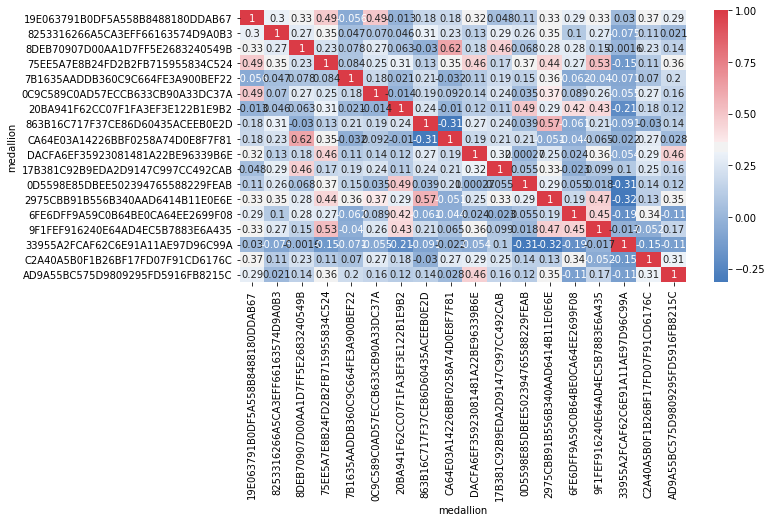

In [94]:
sns.heatmap(top18_corr, cmap=cmap, annot=True);

In [95]:
top18_corr_adj = top18_corr.copy()

In [99]:
top18_corr_adj.iloc[0][0]=-1

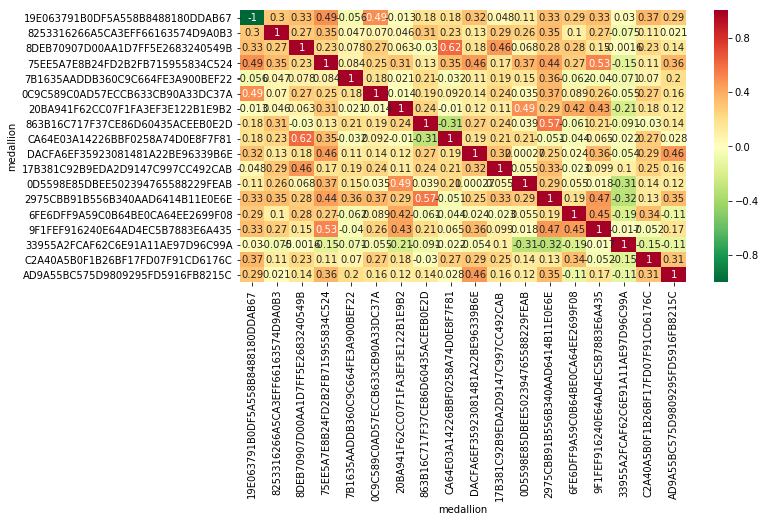

In [100]:
sns.heatmap(top18_corr_adj, cmap='RdYlGn_r', annot=True);

Buid new portfolio choosing assets with lots of negative correlation

In [113]:
portfolio10=top20_timeseries.iloc[[0,1,3,4,5,8,9,10,15,17]]

In [114]:
portfolio10

sum                                  \
                                 total_income                                   
pickup_dateday                             1       2       3       4       5    
medallion                                                                       
19E063791B0DF5A558B8488180DDAB67       857.00  827.28  898.86  918.91  944.57   
8253316266A5CA3EFF66163574D9A0B3       890.95  776.60  818.46  786.15  941.60   
8DEB70907D00AA1D7FF5E2683240549B       742.25  922.51  810.82  879.37  881.37   
75EE5A7E8B24FD2B2FB715955834C524       796.46  644.84  772.61  851.03  833.04   
7B1635AADDB360C9C664FE3A900BEF22       729.15  776.65  825.28  813.17  801.22   
20BA941F62CC07F1FA3EF3E122B1E9B2       706.99  700.92  833.67  711.29  857.25   
863B16C717F37CE86D60435ACEEB0E2D       768.91  780.21  771.82  791.44  824.76   
CA64E03A14226BBF0258A74D0E8F7F81       801.98  780.19  808.62  734.10  857.10   
6FE6DFF9A59C0B64BE0CA64EE2699F08       730.96  634.25  685.77  904.21  880.80   
33955A2FCAF62C6E91A11AE97D96C99A       847.01  806.40  929.89  846.81  736.01   

                                                                          \
                                                                           
pickup_dateday                        6       7       8       9       10   
medallion                                                                  
19E063791B0DF5A558B8488180DDAB67  957.15  831.22  896.04  863.85  837.63   
8253316266A5CA3EFF66163574D9A0B3  857.50  822.50  749.25  816.85  864.10   
8DEB70907D00AA1D7FF5E2683240549B  792.62  852.20  849.69  779.99  878.04   
75EE5A7E8B24FD2B2FB715955834C524  974.18  826.84  723.06  715.36  727.81   
7B1635AADDB360C9C664FE3A900BEF22  877.98  826.22  810.08  760.27  779.05   
20BA941F62CC07F1FA3EF3E122B1E9B2  804.36  937.64  778.77  663.45  812.72   
863B16C717F37CE86D60435ACEEB0E2D  822.18  853.72  673.51  796.65  846.19   
CA64E03A14226BBF0258A74D0E8F7F81  941.22  642.59  787.81  671.07  863.92   
6FE6DFF9A59C0B64BE0CA64EE2699F08  715.43  910.22  828.37  808.02  724.78   
33955A2FCAF62C6E91A11AE97D96C99A  464.27  557.90  685.37  770.91  752.50   

                                                                          \
                                                                           
pickup_dateday                        11      12      13      14      15   
medallion                                                                  
19E063791B0DF5A558B8488180DDAB67  949.96  979.85  939.90  940.82  668.89   
8253316266A5CA3EFF66163574D9A0B3  804.26  895.80  688.95  864.80  814.70   
8DEB70907D00AA1D7FF5E2683240549B  758.50  864.12  794.01  811.48  703.48   
75EE5A7E8B24FD2B2FB715955834C524  941.42  929.03  908.77  880.00  727.57   
7B1635AADDB360C9C664FE3A900BEF22  744.98  929.12  687.00  865.29  972.97   
20BA941F62CC07F1FA3EF3E122B1E9B2  848.38  833.28  889.20  686.14  802.94   
863B16C717F37CE86D60435ACEEB0E2D  730.55  747.49  781.05  828.42  759.07   
CA64E03A14226BBF0258A74D0E8F7F81  789.92  860.58  959.57  891.70  761.05   
6FE6DFF9A59C0B64BE0CA64EE2699F08  803.29  958.11  822.27  463.40  640.56   
33955A2FCAF62C6E91A11AE97D96C99A  753.35  791.46  873.95  851.90  821.26   

                                                                           \
                                                                            
pickup_dateday                        16      17      18       19      20   
medallion                                                                   
19E063791B0DF5A558B8488180DDAB67  888.08  891.92  882.05  1019.42  918.91   
8253316266A5CA3EFF66163574D9A0B3  756.68  844.70  958.55   862.05  833.20   
8DEB70907D00AA1D7FF5E2683240549B  833.23  788.42  855.73  1030.76  917.74   
75EE5A7E8B24FD2B2FB715955834C524  650.19  802.30  864.37   861.10  900.74   
7B1635AADDB360C9C664FE3A900BEF22  787.03  927.24  843.20   917.02  789.08   
20BA941F62CC07F1FA3EF3E122B1E9B2  695.72  841.91  866.13   801.30  691.15   
863B16C

In [116]:
portfolio10_corr = portfolio10.T.corr()

In [117]:
portfolio10_corr

medallion,19E063791B0DF5A558B8488180DDAB67,8253316266A5CA3EFF66163574D9A0B3,8DEB70907D00AA1D7FF5E2683240549B,75EE5A7E8B24FD2B2FB715955834C524,7B1635AADDB360C9C664FE3A900BEF22,20BA941F62CC07F1FA3EF3E122B1E9B2,863B16C717F37CE86D60435ACEEB0E2D,CA64E03A14226BBF0258A74D0E8F7F81,6FE6DFF9A59C0B64BE0CA64EE2699F08,33955A2FCAF62C6E91A11AE97D96C99A
medallion,,,,,,,,,,
19E063791B0DF5A558B8488180DDAB67,1.000000,0.301694,0.331359,0.485650,-0.055559,-0.013455,0.177254,0.179750,0.286662,0.029507
8253316266A5CA3EFF66163574D9A0B3,0.301694,1.000000,0.274933,0.346518,0.047123,0.045966,0.309941,0.229047,0.104090,-0.075020
8DEB70907D00AA1D7FF5E2683240549B,0.331359,0.274933,1.000000,0.228749,0.077911,0.063090,-0.030393,0.616201,0.284845,-0.001634
75EE5A7E8B24FD2B2FB715955834C524,0.485650,0.346518,0.228749,1.000000,0.083691,0.307859,0.126282,0.347755,0.271903,-0.148320
7B1635AADDB360C9C664FE3A900BEF22,-0.055559,0.047123,0.077911,0.083691,1.000000,0.021480,0.209482,-0.031925,-0.061997,-0.071304
20BA941F62CC07F1FA3EF3E122B1E9B2,-0.013455,0.045966,0.063090,0.307859,0.021480,1.000000,0.243336,-0.009956,0.418534,-0.210704
863B16C717F37CE86D60435ACEEB0E2D,0.177254,0.309941,-0.030393,0.126282,0.209482,0.243336,1.000000,-0.307919,-0.061211,-0.090609
CA64E03A14226BBF0258A74D0E8F7F81,0.179750,0.229047,0.616201,0.347755,-0.031925,-0.009956,-0.307919,1.000000,-0.044350,-0.022266
6FE6DFF9A59C0B64BE0CA64EE2699F08,0.286662,0.104090,0.284845,0.271903,-0.061997,0.418534,-0.061211,-0.044350,1.000000,-0.191575


In [119]:
portfolio10_corr_adj=portfolio10_corr.copy()
portfolio10_corr_adj.iloc[0][0]=-1

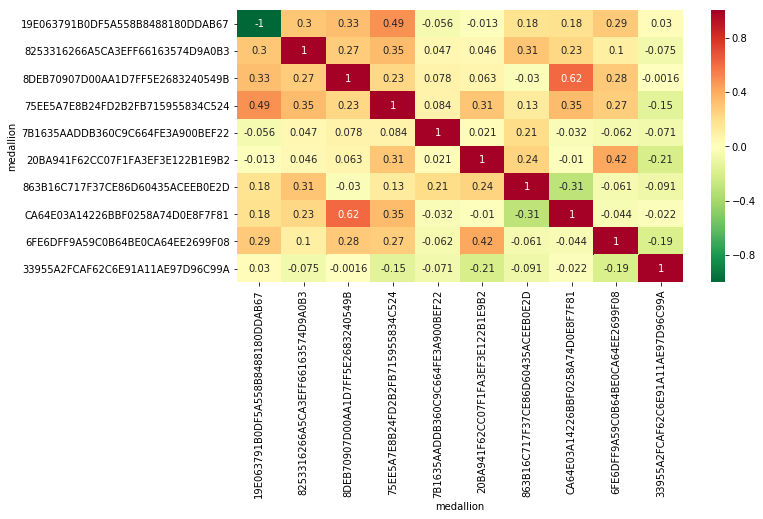

In [120]:
sns.heatmap(portfolio10_corr_adj, cmap='RdYlGn_r', annot=True);

Then calculate the means, covariance matrix 

In [123]:
portfolio10_means = portfolio10.T.mean()

In [124]:
portfolio10_means

medallion
19E063791B0DF5A558B8488180DDAB67    895.675000
8253316266A5CA3EFF66163574D9A0B3    825.955000
8DEB70907D00AA1D7FF5E2683240549B    823.208333
75EE5A7E8B24FD2B2FB715955834C524    817.368667
7B1635AADDB360C9C664FE3A900BEF22    812.997333
20BA941F62CC07F1FA3EF3E122B1E9B2    794.684333
863B16C717F37CE86D60435ACEEB0E2D    791.482000
CA64E03A14226BBF0258A74D0E8F7F81    787.189000
6FE6DFF9A59C0B64BE0CA64EE2699F08    781.277000
33955A2FCAF62C6E91A11AE97D96C99A    779.848000
dtype: float64

In [125]:
portfolio10_covmatrix = portfolio10.T.cov()

In [135]:
portfolio10_covmatrix

medallion,19E063791B0DF5A558B8488180DDAB67,8253316266A5CA3EFF66163574D9A0B3,8DEB70907D00AA1D7FF5E2683240549B,75EE5A7E8B24FD2B2FB715955834C524,7B1635AADDB360C9C664FE3A900BEF22,20BA941F62CC07F1FA3EF3E122B1E9B2,863B16C717F37CE86D60435ACEEB0E2D,CA64E03A14226BBF0258A74D0E8F7F81,6FE6DFF9A59C0B64BE0CA64EE2699F08,33955A2FCAF62C6E91A11AE97D96C99A
medallion,,,,,,,,,,
19E063791B0DF5A558B8488180DDAB67,5368.277909,1397.552919,2765.796943,3495.936021,-416.042390,-72.387360,720.481638,1628.118174,2112.008829,194.227924
8253316266A5CA3EFF66163574D9A0B3,1397.552919,3997.311881,1980.224764,2152.446041,304.495469,213.390302,1087.106903,1790.229509,661.758840,-426.113210
8DEB70907D00AA1D7FF5E2683240549B,2765.796943,1980.224764,12978.006642,2560.272543,907.123168,527.734376,-192.080672,8678.141984,3263.034171,-16.727117
75EE5A7E8B24FD2B2FB715955834C524,3495.936021,2152.446041,2560.272543,9652.615246,840.355251,2220.886599,688.292623,4223.732450,2686.240151,-1309.144158
7B1635AADDB360C9C664FE3A900BEF22,-416.042390,304.495469,907.123168,840.355251,10445.385027,161.194315,1187.730954,-403.359668,-637.153108,-654.697885
20BA941F62CC07F1FA3EF3E122B1E9B2,-72.387360,213.390302,527.734376,2220.886599,161.194315,5391.433756,991.214388,-90.372323,3090.233176,-1389.925929
863B16C717F37CE86D60435ACEEB0E2D,720.481638,1087.106903,-192.080672,688.292623,1187.730954,991.214388,3077.649092,-2111.768684,-341.463187,-451.591699
CA64E03A14226BBF0258A74D0E8F7F81,1628.118174,1790.229509,8678.141984,4223.732450,-403.359668,-90.372323,-2111.768684,15282.709940,-551.314155,-247.296347
6FE6DFF9A59C0B64BE0CA64EE2699F08,2112.008829,661.758840,3263.034171,2686.240151,-637.153108,3090.233176,-341.463187,-551.314155,10111.523146,-1730.664679


Finally, calculate the portfolio mean and stddev

In [127]:
weights = np.asarray([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [130]:
portfolio_mean = np.sum(portfolio10_means*weights)

In [131]:
portfolio_mean

810.9684666666667

In [132]:
portfolio_stddev = np.sqrt(np.dot(weights.T,np.dot(portfolio10_covmatrix,weights)))

In [133]:
portfolio_stddev

40.90864416345222

Build a dataframe showing the means and std devs for the selected portfolio (just for display purposes)

In [136]:
portfolio10_means_and_stddevs=pd.DataFrame(portfolio10_means,columns=['means'])

In [137]:
portfolio10_means_and_stddevs['stddevs']=portfolio10.T.std()

In [138]:
portfolio10_means_and_stddevs

,means,stddevs
medallion,,
19E063791B0DF5A558B8488180DDAB67,895.675000,73.268533
8253316266A5CA3EFF66163574D9A0B3,825.955000,63.224298
8DEB70907D00AA1D7FF5E2683240549B,823.208333,113.921054
75EE5A7E8B24FD2B2FB715955834C524,817.368667,98.247724
7B1635AADDB360C9C664FE3A900BEF22,812.997333,102.202666
20BA941F62CC07F1FA3EF3E122B1E9B2,794.684333,73.426383
863B16C717F37CE86D60435ACEEB0E2D,791.482000,55.476563
CA64E03A14226BBF0258A74D0E8F7F81,787.189000,123.623258
6FE6DFF9A59C0B64BE0CA64EE2699F08,781.277000,100.556070
